In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product

# Create some sample data

I will create data that has to be shaped, but if you data is already in the correct shape you can skip this step.

Here I create ten institutions and 15 survey questions. I randomly assign responses to each question since the example doesn't really care about any sort of pattern recognition.

In [98]:
institution_id = [n for n in np.arange(10)]
question_id = [n for n in np.arange(1, 16, 1)]
data = np.array([x for x in product(institution_id, question_id)])
df = pd.DataFrame(data, columns=['institution_id', 'question_id'])
df['response'] = np.random.randint(0, 2, size=df.shape[0])
df.head()

,institution_id,question_id,response
0,0,1,0
1,0,2,1
2,0,3,1
3,0,4,1
4,0,5,1


In [99]:
df.describe()

,institution_id,question_id,response
count,150.000000,150.000000,150.000000
mean,4.500000,8.000000,0.520000
std,2.881904,4.334968,0.501274
min,0.000000,1.000000,0.000000
25%,2.000000,4.000000,0.000000
50%,4.500000,8.000000,1.000000
75%,7.000000,12.000000,1.000000
max,9.000000,15.000000,1.000000


In [100]:
df_pivot = df.pivot(index='institution_id', columns='question_id', values='response')
df_pivot

question_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
institution_id,,,,,,,,,,,,,,,
0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0
1,0,0,1,1,0,1,0,1,0,1,1,0,0,1,1
2,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
3,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1
4,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0
5,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1
6,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0
7,1,0,1,1,0,0,0,1,1,1,0,1,0,1,1
8,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1


# Plotting and data

If you data is already shaped like the data above, you can just start here.

To understand why we are adding 1 to x and y see this stackoverflow post:

https://stackoverflow.com/questions/24494879/strange-behavior-pcolormesh-and-meshgrid-easy

(0, 15)

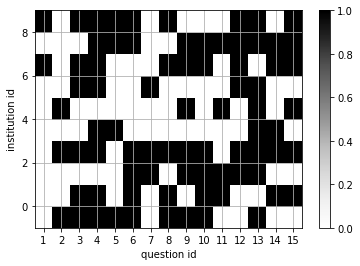

In [113]:
x = np.arange(df_pivot.columns.min()-1, df_pivot.columns.max() + 1, 1)
y = np.arange(df_pivot.index.min()-1, df_pivot.index.max() + 1, 1)

X, Y = np.meshgrid(x, y)
z = df_pivot.values

fig, ax = plt.subplots()

cbar = ax.pcolormesh(X, Y, z, cmap='Greys')

fig.colorbar(cbar, )

ax.set_xlabel('question id')
ax.set_ylabel('institution id')

# ax.set_ylim(-1, 10)

ax.set_xticks(x + 0.5)
ax.set_xticklabels(x+1)
ax.grid(True)

ax.set_xlim(0, 15)
